In [51]:
import matplotlib.pyplot as plt
import cv2
import skimage
import numpy as np
import pandas as pd

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from skimage.metrics import structural_similarity as ssim

In [6]:
path = 'image.jpg'
img = cv2.imread(path)

In [7]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

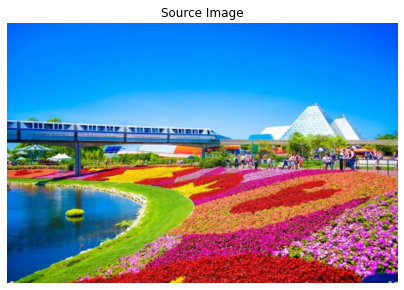

In [8]:
draw_picture(img, 'Source Image')

In [15]:
img = cv2.resize(img, (128, 128))
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pix = rgb_img.reshape((-1,3))
pix = np.float32(pix)
print(pix.shape)
pix

(16384, 3)


array([[  0.,  93., 253.],
       [  0.,  95., 254.],
       [  0.,  97., 254.],
       ...,
       [159., 192., 202.],
       [  5.,  31., 109.],
       [121., 128., 133.]], dtype=float32)

K-Means

In [74]:
def kmeans_clusters(pix, k):
    
    # number of clusters (K)
    clusters = KMeans(k).fit(pix)

    # convert back to 8 bit values
    centers = np.uint8(clusters.cluster_centers_)

    # flatten the labels array
    labels = clusters.labels_.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(rgb_img.shape)

    # show the image
    plt.figure(figsize=(7, 5))
    plt.imshow(segmented_image)
    ssim_value = round(ssim(img, segmented_image, multichannel=True),2)
    plt.title('Method: K-Means\n' + r'Number of clusters: '+ str(k)+'\n'+r'SSIM: '+str(ssim_value))
    plt.show()

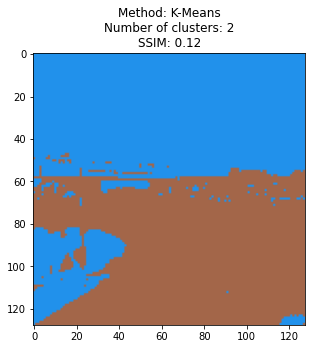

In [75]:
kmeans_clusters(pix, 2)

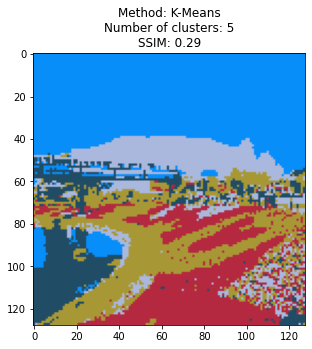

In [55]:
kmeans_clusters(pix, 5)

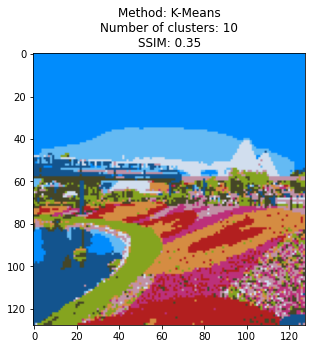

In [56]:
kmeans_clusters(pix, 10)

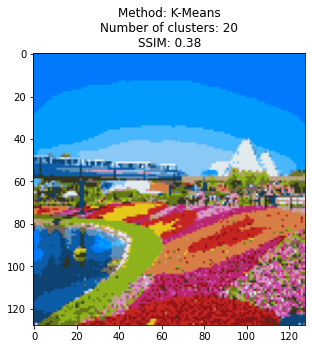

In [57]:
kmeans_clusters(pix, 20)

In [47]:
def agg_clusters(pix, k):

    # number of clusters (K)
    clusters = AgglomerativeClustering(k).fit(pix)
    
    #centers
    y_predict = AgglomerativeClustering(k).fit_predict(pix)
    clf = NearestCentroid()
    clf.fit(pix, y_predict)

    # convert back to 8 bit values
    centers = np.uint8(clf.centroids_)

    # flatten the labels array
    labels = clusters.labels_.flatten()

    # convert all pixels to the color of the centroids
    segmented_image = centers[labels.flatten()]

    # reshape back to the original image dimension
    segmented_image = segmented_image.reshape(rgb_img.shape)

    # show the image
    plt.figure(figsize=(7, 5))
    plt.imshow(segmented_image)
    ssim_value = round(ssim(img, segmented_image, multichannel=True),2)
    plt.title('Method: Agglomerative Clustering\n' + r'Number of clusters: '+ str(k)+'\n'+r'SSIM: '+str(ssim_value))
    plt.show()
    
    # append results
    results_append('Agglomerative Clustering', k, ssim_value)

Agglomerative Clustering

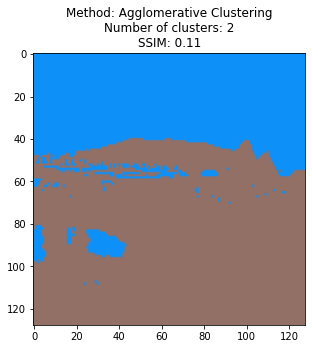

In [58]:
agg_clusters(pix, 2)

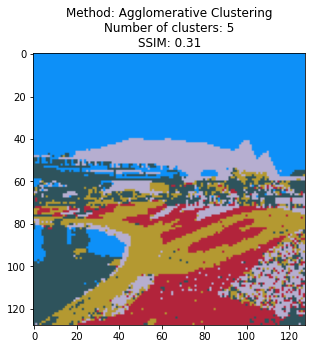

In [76]:
agg_clusters(pix, 5)

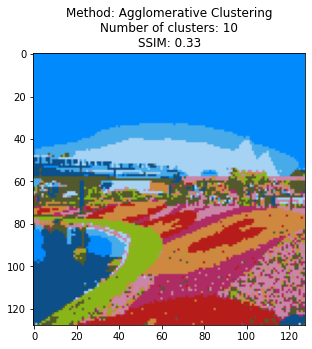

In [77]:
agg_clusters(pix, 10)

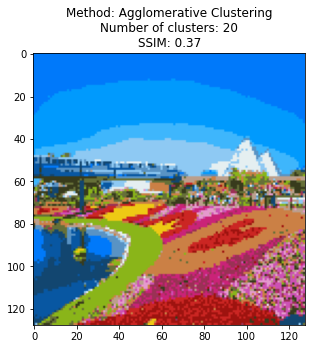

In [78]:
agg_clusters(pix, 20)

DBSCAN

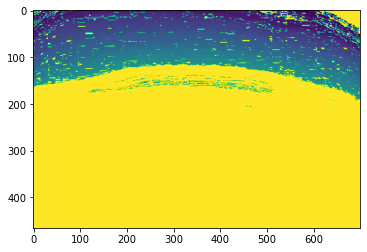

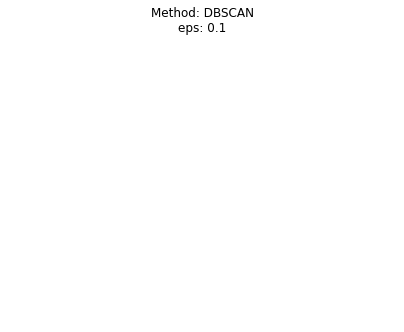

In [102]:
img = cv2.imread(path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pix = rgb_img.reshape((-1,3))
pix = np.float32(pix)
db = DBSCAN(eps=0.1, min_samples=128).fit(pix)
db_image = np.uint8(db.labels_.reshape(rgb_img.shape[:2]))

plt.imshow(db_image)
plt.figure(figsize=(7, 5))
plt.axis('off')
plt.title('Method: DBSCAN\n' + r'eps: '+ str(0.1)+'\n')
plt.show()

Вывод: модели K-Means и Agglomerative Clustering показали сопоставимые результаты
Сопоставляя метрику схожести изображений SSIM, можно сделать вывод, что метод K-Means будет работать точнее при необходимости в более точном результате распознавания